In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

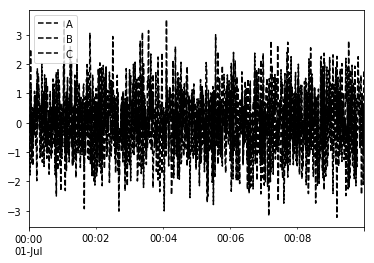

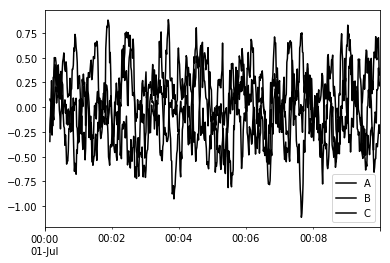

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [10]:
#exponentially weighted
#pd.ewma(df, span = 15, min_periods = 2)[1:10]

In [11]:
df_exp_wighted_avg = df.ewm(halflife=15,min_periods=2,adjust=True,ignore_na=False).mean()[1:10]
df_exp_wighted_avg

,A,B,C
2016-07-01 00:00:01,-0.859409,-0.046412,-0.946131
2016-07-01 00:00:02,-0.544417,-0.110911,-1.238517
2016-07-01 00:00:03,-0.106311,0.586883,-0.554387
2016-07-01 00:00:04,-0.187266,0.279789,-0.193933
2016-07-01 00:00:05,-0.368307,0.213480,-0.413750
2016-07-01 00:00:06,-0.295696,0.238361,-0.262348
2016-07-01 00:00:07,-0.466346,0.110701,-0.347089
2016-07-01 00:00:08,-0.339587,0.124664,-0.267998
2016-07-01 00:00:09,-0.338603,0.058693,-0.212914


In [12]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [13]:
df.head()

,A,B,C,D
2016-06-06,-0.350753,0.734784,1.492401,-0.228054
2016-06-07,0.403586,0.639324,-0.317491,-1.343020
2016-06-08,-0.048610,-1.647836,-1.638503,1.193756
2016-06-09,0.245537,-0.427867,0.917555,-0.810623
2016-06-10,1.251885,-1.643408,1.043614,0.691370


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ed93cf8>,
      dtype=object)

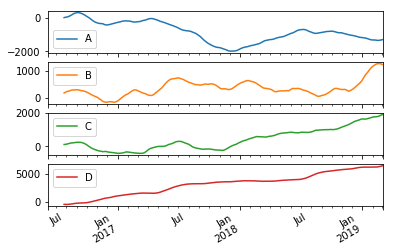

In [14]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [15]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

/Users/nikhilreddy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.827064,1.619572,0.881302,1.446358


In [16]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.148960,1.054447,1.333656,-0.899564
2016-06-08,-0.097899,0.611722,0.734573,-0.725482
2016-06-09,-0.010985,0.283393,0.664420,-0.841097
2016-06-10,0.291541,-0.242286,0.831051,-0.772191


In [17]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [18]:
# EWMA
# Why use EWMA?

In [19]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [20]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting